# RNA - Neurônio Perceptron

#### Alunos: 
* Daniel Benoliel Malcher - 1815080002
* Débora Moraes Pereira - 1815080080
* Lucas Migliorin Da Rosa - 1915080068
* Thiago Silva Jezini - 1915080083

# Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math
import pandas as pd
from sklearn.model_selection import train_test_split

# Abrindo dados

In [3]:
directory = os.getcwd()
print(directory)
path = directory + "/rna-data/dataAll.txt"

dados = np.fromfile(path)
dados = dados.reshape(-1,3)

print(f"Tamanho: {dados.shape}")


/content
Tamanho: (1000, 3)


# Iniciando pesos

In [4]:
w_Ini = []
for i in range(0,3):
    w_Ini.append(random.randrange(-5000,5000)/10000)

w_Ini = np.array(w_Ini)
print("Size: {}".format(w_Ini.size))
print('Pesos: {}'.format(w_Ini))

Size: 3
Pesos: [-0.1148 -0.4985 -0.0879]


# Experimentação 1

In [5]:
limiar = 0

vies = -1

n = 0.1

def verificar_Valor(posi):
    x = np.array([vies,dados[posi][0],dados[posi][1]])
    resul = round(np.dot(x,w_Ini.T),4)
    return resul
    
def funcao(valor):
    if(valor >= limiar):
        return True
    else:
        return False

In [6]:
corrigi = True
i = 0
epocas = 0
while(corrigi):
    if(i >= dados.shape[0]):
        corrigi = False
    
    else:
        valor = verificar_Valor(i)
        preditor = funcao(valor)

        if(preditor == dados[i][-1]):
            i += 1
        else:
            epocas += 1
            x = np.array([vies,dados[i][0],dados[i][1]])
            w_Ini =  (w_Ini + (n*(dados[i][-1] - preditor)*x))
            i = 0

      
print('Finalizado\nÉpocas: {}\nPesos: {}'.format(epocas,w_Ini))

Finalizado
Épocas: 96
Pesos: [  -1.7148   275.54685 -274.47401]


# Plotando gráfico

In [7]:
color = []
x = []
y = []
for i in range(0,dados.shape[0]):
    x.append(dados[i][0])
    y.append(dados[i][1])
    if(dados[i][2] == 0):
        color.append('red')
    else:
        color.append('blue')

In [8]:
def fun_linear(x):
    return (w_Ini[0]/w_Ini[2]) - (((w_Ini[1]/w_Ini[2]))*x)

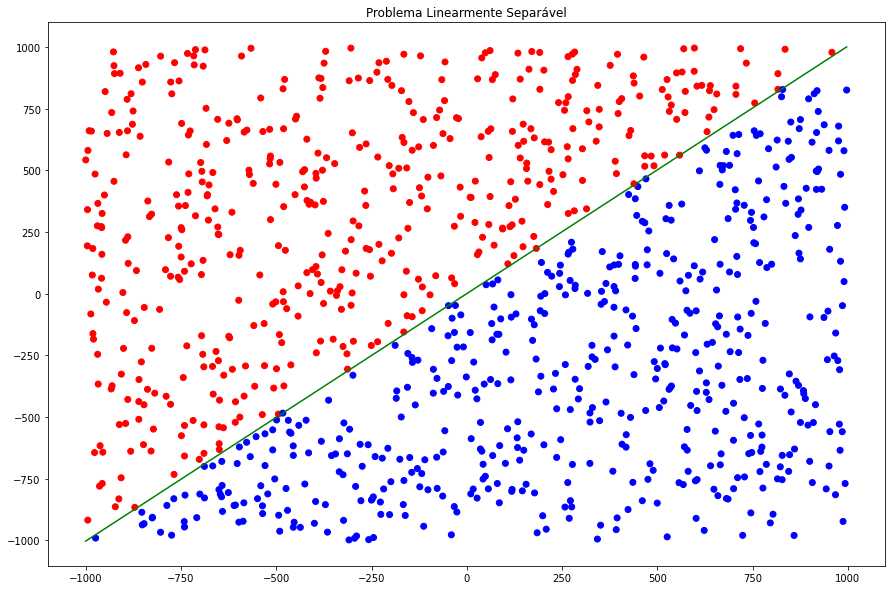

In [9]:
fig = plt.figure(figsize=(15,10))
plt.scatter(x,y,c=color)
plt.plot([min(x),max(x)],[fun_linear(min(x)),fun_linear(max(x))],color = 'green')
plt.title('Problema Linearmente Separável')
plt.savefig('./prob_li_sep.png')
plt.show()

# Parte II – Experimentação 2

O identificador obtido pela nossa equipe é o 1, então utilizaremos o arquivo data1.txt

## Leitura dos dados do arquivo data1.txt

In [10]:
path = directory + "/rna-data/data1.txt"
dados = np.fromfile(path)
#dados = dados.reshape(-1,3)
dados.reshape(-1,3)
print(f"Tamanho: {dados.shape}")
print(dados.size)

Tamanho: (1800,)
[ 0.13658687 -0.16460088  0.         ...  0.99252852  1.06937678
  1.        ]
1800


In [11]:
entrada = []
for i in range(0,dados.size,3):
    entrada.append(([dados[i],dados[i+1]],dados[i+2]))
entrada = np.array(entrada, dtype=object)
print("Size: {}".format(entrada.size))

Size: 1200


## Classe Perceptron

In [12]:
class Perceptron():
    def __init__(self, entrada, intervalo, n, vies = -1, limiar = 0):
        self.entrada = entrada
        self.vies = vies
        self.limiar = limiar
        self.n = n
        self.intervalo = intervalo
        self.w_Ini = np.zeros(3)
        
    def verificar_Valor(self,posi):
        x = np.array([self.vies,self.entrada[posi][0][0],self.entrada[posi][0][1]])
        resul = round(np.dot(x,self.w_Ini.T),4)
        return resul
    
    def funcao(self,valor):
        if(valor >= self.limiar):
            return True
        else:
            return False
        
    def init_Wini(self):
        for i in np.arange(3):
            if(int(self.intervalo[0]) == 0):
                result = random.randrange(self.intervalo[0]*1000,self.intervalo[1]*1000)/1000
                self.w_Ini[i] = (result)
            else:
                self.w_Ini[i] = (random.randrange(self.intervalo[0],self.intervalo[1]))
            
    def init_perceptron(self):
        self.init_Wini()
        corrigi = True
        i = 0
        epocas = 0
        while(corrigi):
            if(i >= self.entrada.shape[0]):
                corrigi = False

            else:
                valor = self.verificar_Valor(i)
                preditor = self.funcao(valor)

                if(preditor == self.entrada[i][1]):
                    i += 1
                else:
                    epocas += 1
                    x = np.array([self.vies,self.entrada[i][0][0],self.entrada[i][0][1]])
                    self.w_Ini =  np.array(self.w_Ini + (self.n*(self.entrada[i][1] - preditor)*x))
                    i = 0

        print("Finalizado")
        print('Épocas: {}'.format(epocas))
        print('Pesos: {}'.format(w_Ini))
        return epocas

## Configurações

In [13]:
n = [0.4,0.1,0.01] 
intervalos = [(-100,100),(-1,1),(-0.5,0.5)]

## Treinamento

In [14]:
n_total = []
intervalos_total = []
epocas_total = []
w_Ini_total = []

for i in np.arange(100):
    for n_i in n:
        for intervalo in intervalos:
            print('Configuração taxa de aprendizado: {}\nIntervalo: {}'.format(n_i, intervalo))
            perceptron = Perceptron(entrada,intervalo,n_i)
            n_total.append(n_i)
            intervalos_total.append(intervalo)
            epocas_total.append(perceptron.init_perceptron())
            w_Ini_total.append(perceptron.w_Ini)

Configuração taxa de aprendizado: 0.4
 Intervalo: (-100, 100)
Finalizado
Épocas: 370
Pesos: [  -1.7148   275.54685 -274.47401]
Configuração taxa de aprendizado: 0.4
 Intervalo: (-1, 1)
Finalizado
Épocas: 30
Pesos: [  -1.7148   275.54685 -274.47401]
Configuração taxa de aprendizado: 0.4
 Intervalo: (-0.5, 0.5)
Finalizado
Épocas: 24
Pesos: [  -1.7148   275.54685 -274.47401]
Configuração taxa de aprendizado: 0.1
 Intervalo: (-100, 100)
Finalizado
Épocas: 332
Pesos: [  -1.7148   275.54685 -274.47401]
Configuração taxa de aprendizado: 0.1
 Intervalo: (-1, 1)
Finalizado
Épocas: 52
Pesos: [  -1.7148   275.54685 -274.47401]
Configuração taxa de aprendizado: 0.1
 Intervalo: (-0.5, 0.5)
Finalizado
Épocas: 38
Pesos: [  -1.7148   275.54685 -274.47401]
Configuração taxa de aprendizado: 0.01
 Intervalo: (-100, 100)
Finalizado
Épocas: 17392
Pesos: [  -1.7148   275.54685 -274.47401]
Configuração taxa de aprendizado: 0.01
 Intervalo: (-1, 1)
Finalizado
Épocas: 261
Pesos: [  -1.7148   275.54685 -274.474

## Resultados

In [16]:
df = pd.DataFrame({'Taxa': n_total, 'Intervalo': intervalos_total, 'Epocas': epocas_total, 'Pesos': w_Ini_total})
df.to_csv('./perceptron.csv',index=False)
df = pd.read_csv('./perceptron.csv')


In [19]:
aux_w = [None]*900
w = df['Pesos']
for i in range(900):
    aux_w[i] = [float(j) for j in w[i].replace("  "," ").replace("[","").replace("]","").split()]

inter = df['Intervalo']
df

,Taxa,Intervalo,Epocas,Pesos
0,0.40,"(-100, 100)",370,[49.2 38.2159325 22.10487452]
1,0.40,"(-1, 1)",30,[1.6 1.20535026 0.84991687]
2,0.40,"(-0.5, 0.5)",24,[1.726 1.32494208 0.98122952]
3,0.10,"(-100, 100)",332,[30.4 15.902674 20.89689566]
4,0.10,"(-1, 1)",52,[0.6 0.44214823 0.31418261]
...,...,...,...,...
895,0.10,"(-1, 1)",77,[0.7 0.53634697 0.394103 ]
896,0.10,"(-0.5, 0.5)",44,[0.644 0.49007948 0.36535383]
897,0.01,"(-100, 100)",2141,[70.59 38.93497643 46.36911173]
898,0.01,"(-1, 1)",310,[0.08 0.06075584 0.03996299]


## Média e o desvio padrão

In [ ]:
intervalos = ['(-100, 100)','(-1, 1)','(-0.5, 0.5)']
medias = []
for i in n:
    for j in intervalos:
        df_1 = df[df['Taxa'] == i]
        df_1 = df_1[df_1['Intervalo'] == j]
        medias.append([i,j,df_1['Epocas'].mean(),round(df_1['Epocas'].std(),2)])

df_mean = pd.DataFrame(medias,columns=['Taxa','Intervalos','Medias','Desvio Padrão'])
df_mean

,Taxa,Intervalos,Medias,Desvio Padrão
0,0.40,"(-100, 100)",375.37,179.59
1,0.40,"(-1, 1)",40.01,5.04
2,0.40,"(-0.5, 0.5)",37.92,16.14
3,0.10,"(-100, 100)",1380.84,813.60
4,0.10,"(-1, 1)",47.09,14.89
5,0.10,"(-0.5, 0.5)",33.85,17.83
6,0.01,"(-100, 100)",14243.29,8130.01
7,0.01,"(-1, 1)",229.01,76.66
8,0.01,"(-0.5, 0.5)",76.77,38.69


# Experimento III - Validação Holdout em Problema Não-Linearmente Separável

In [ ]:
dados = np.fromfile('dataHoldout.txt')
dados.reshape(-1,3)

In [ ]:
entrada = []
for i in range(0,dados.size,3):
    entrada.append(([dados[i],dados[i+1]],dados[i+2]))
entrada = np.array(entrada)
print("Size: {}".format(entrada.size))

In [ ]:
entrada_aux = []
for i in range(0,dados.size,3):
    entrada_aux.append((dados[i],dados[i+1],dados[i+2]))
entrada_aux = np.array(entrada_aux)
print("Size: {}".format(entrada_aux.size))

In [ ]:
color = []
x = []
y = []
for i in range(0,dados.size,3):
    x.append(dados[i])
    y.append(dados[i+1])
    if(dados[i+2] == 0):
        color.append('red')
    else:
        color.append('blue')

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.scatter(x,y,c=color)
plt.title('Problema Não-Linearmente Separável')
plt.savefig('./prob_n_li_sep.png')
plt.show()

In [ ]:
df = pd.DataFrame(entrada_aux,columns = ['x','y','saida'])
y1 = df['saida']
df.drop(['saida'],axis=1,inplace = True)
x1 = df
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.30, random_state=100)

In [ ]:
train = X_train.copy()
train['saida'] = Y_train.copy()

In [ ]:
train.head()

In [ ]:
train_aux = []
for x,y,saida in zip(train['x'].values,train['y'].values,train['saida'].values):
    train_aux.append(([x,y],saida))

train_aux = np.array(train_aux)

In [ ]:
class Perceptron_Estudo_Sem_Solucao():
    def __init__(self,entrada,intervalo,n,vies = -1,limiar = 0):
        self.entrada = entrada
        self.vies = vies
        self.limiar = limiar
        self.n = n
        self.intervalo = intervalo
        self.w_Ini = np.zeros(3)
        
    def verificar_Valor(self,posi):
        x = np.array([self.vies,self.entrada[posi][0][0],self.entrada[posi][0][1]])
        resul = round(np.dot(x,self.w_Ini.T),4)
        return resul
    
    def funcao(self,valor):
        if(valor >= self.limiar):
            return True
        else:
            return False
        
    def init_Wini(self):
        for i in np.arange(3):
            if(int(self.intervalo[0]) == 0):
                result = random.randrange(self.intervalo[0]*1000,self.intervalo[1]*1000)/1000
                self.w_Ini[i] = (result)
            else:
                self.w_Ini[i] = (random.randrange(self.intervalo[0],self.intervalo[1]))
            
    def init_perceptron(self):
        self.init_Wini()
        corrigi = True
        i = 0
        epocas = 0
        while(corrigi):
            if(epocas == 99):
                corrigi = False
            else:
                if(i >= self.entrada.shape[0]):
                    corrigi = False

                else:
                    valor = self.verificar_Valor(i)
                    preditor = self.funcao(valor)

                    if(preditor == self.entrada[i][1]):
                        i += 1
                    else:
                        epocas += 1
                        x = np.array([self.vies,self.entrada[i][0][0],self.entrada[i][0][1]])
                        self.w_Ini =  np.array(self.w_Ini + (self.n*(self.entrada[i][1] - preditor)*x))
                        i = 0


        print('Finalizado\nÉpocas: {}\nPesos: {}'.format(epocas,self.w_Ini))
        return epocas

In [ ]:
perceptron = Perceptron_Estudo_Sem_Solucao(train_aux,(-1,1),0.1)

In [ ]:
perceptron.init_perceptron()

In [ ]:
perceptron.w_Ini